In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.readout import ReadoutExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
import os
from time import time

In [2]:
# Initilizes the experiment and utils
utils = Utils.instance()
exp = ReadoutExperiment()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

1.665

In [4]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:35543
INFO:DRV:      Host server up..............Done 0.06s
INFO:DRV:      Encoding axons/synapses.....Done 15.27s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1581412398.6016357
Include dir is : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1581412398.6016357/initnetwork_0_0.c
gcc -Wall -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -st

INFO:DRV:      Compiling Embedded snips....Done 0.64s
INFO:DRV:      Encoding probes.............Done 0.58ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1581412398.6016357/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1581412398.6016357/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.58s
INFO:DRV:      Configuring registers.......Done 14.49s
INFO:DRV:      Transferring probes.........Done 1.32ms
INFO:DRV:      Transferring spikes.........Done 0.05s
INFO:HST:  chip=1 cpu=0 Transfered values 20, 231, 30 
INFO:HST:  chip=0 cpu=0 Transfered values 20, 231, 30 
INFO:HST:  chip=0 cpu=0 Reset current/vol

INFO:HST:  chip=1 cpu=0 Reset functional state at 3495
INFO:HST:  chip=0 cpu=0 Reset functional state at 3495
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 3696 to 3726
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3696 to 3726
INFO:HST:  chip=1 cpu=0 Reset functional state at 3726
INFO:HST:  chip=0 cpu=0 Reset functional state at 3726
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 3927 to 3957
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3927 to 3957
INFO:HST:  chip=1 cpu=0 Reset functional state at 3957
INFO:HST:  chip=0 cpu=0 Reset functional state at 3957
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4158 to 4188
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4158 to 4188
INFO:HST:  chip=0 cpu=0 Reset functional state at 4188
INFO:HST:  chip=1 cpu=0 Reset functional state at 4188
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4389 to 4419
INFO:HST:  chip=1 cpu=0 Reset current/volt

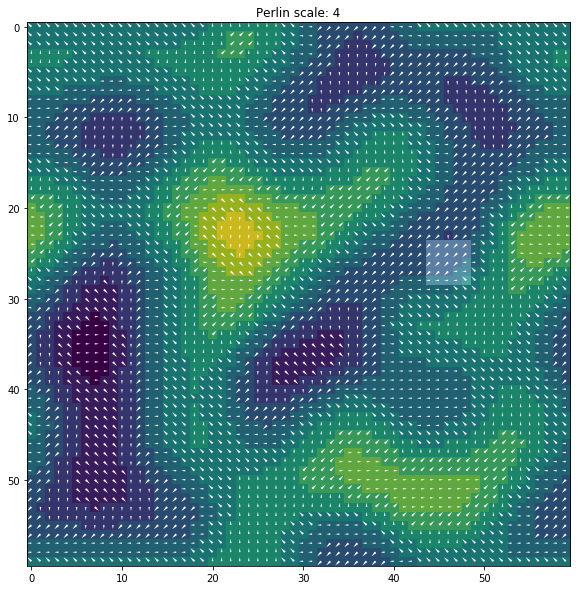

In [5]:
exp.net.plot.landscape()

In [ ]:
#p = exp.net.exVoltageProbes[0].plot()

In [ ]:
#p = exp.net.inVoltageProbes[0].plot()

In [11]:
spks = []
for i in range(len(exp.net.outSpikeProbes)):
    spks.append(exp.net.outSpikeProbes[i].data)

In [21]:
outSpikeTrain = np.vstack(spks)

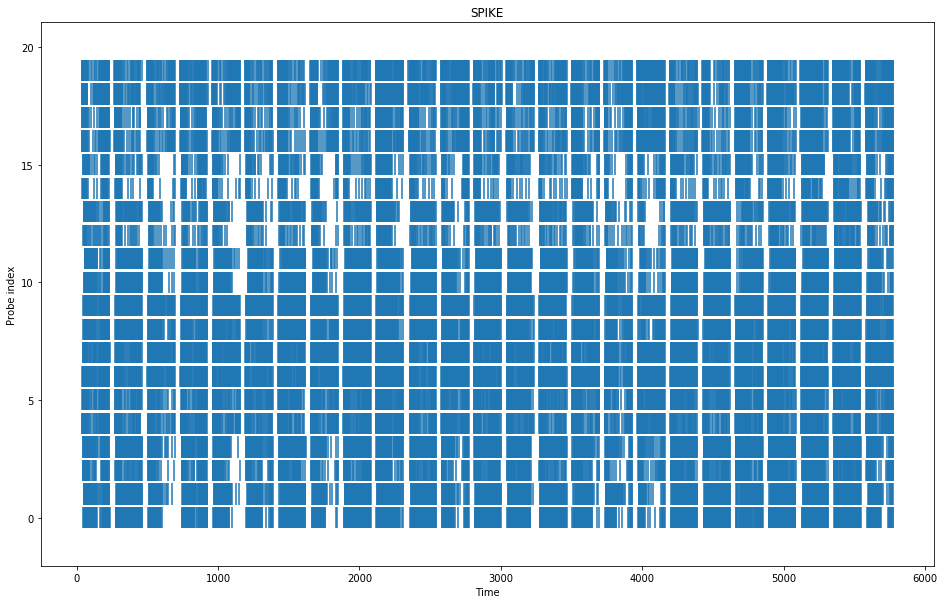

In [9]:
plt.figure(figsize=(16,10))
p = exp.net.outSpikeProbes[0].plot()

In [ ]:
#exp.net.plot.reservoirSpikeTrain(fr=260, to=300)

In [6]:
exp.net.plot.reservoirSpikeTrain()

/home/seq/05-reward/v0.x/pelenet/plots/spikes.py:16: UserWarning: No spikes were probed, spike trains cannot be shown.
  warnings.warn("No spikes were probed, spike trains cannot be shown.")


In [ ]:
for i in range(exp.p.trials):
    fr = exp.p.breakSteps+i*exp.p.totalTrialSteps
    print(np.sum([exp.net.exSpikeProbes[j].data[:,fr:fr+10] for j in range(len(exp.net.exSpikeProbes))], axis=(0,1)))

In [ ]:
fs = []
for i in range(len(exp.net.cueSpikes)):
    cs = np.array(exp.net.cueSpikes[i])
    fs.extend(cs[np.logical_and(cs < 50, cs < 300)])
print(len(fs))

In [ ]:
print(exp.p.breakSteps)
print(exp.p.trialSteps)
print(exp.p.totalTrialSteps)
print(exp.p.totalSteps)

In [ ]:
i = 20
print(np.sum(exp.net.exSpikeProbes[i].data[:,exp.p.breakSteps:exp.p.totalTrialSteps]))
print(np.sum(exp.net.exSpikeProbes[i].data[:,exp.p.breakSteps+exp.p.totalTrialSteps:2*exp.p.totalTrialSteps]))
print(np.sum(exp.net.exSpikeProbes[i].data[:,exp.p.breakSteps+2*exp.p.totalTrialSteps:3*exp.p.totalTrialSteps]))
print(np.sum(exp.net.exSpikeProbes[i].data[:,exp.p.breakSteps+3*exp.p.totalTrialSteps:4*exp.p.totalTrialSteps]))

In [ ]:
offset = exp.p.breakSteps + exp.p.cueSteps + exp.p.cueRelaxation
data = []
for i in range(exp.p.trials):
    fr, to = (i+1)*offset+i*exp.p.movementSteps, (i+1)*offset+(i+1)*exp.p.movementSteps
    data.append(exp.net.exSpikeTrains[:,fr:to])
data = np.array(data)
shp = data.shape
#shp

In [ ]:
import statsmodels.api as sm

In [ ]:
#model = sm.OLS(exp.targetFunction, data[0].T)
#params = model.fit_regularized(alpha=0.02, L1_wt=0.001).params

In [ ]:
#len(params[params==0])

In [ ]:
#ye = np.dot(data[15].T, params)

In [ ]:
%load_ext autoreload
%autoreload
from pelenet.utils import Utils

In [ ]:
#%load_ext autoreload
#%autoreload
#from pelenet.utils import Utils

#alpha=0.02, l1w=0.001
#alpha=0.001, l1w=0.0005
#alpha=0.0012, l1w=0.0007

alpha = 0 #0.001
l1w=0 #0.0005

binSize = 1
(params, ye, performance) = utils.trainOLS(data[:24], data[24], exp.targetFunction, alpha=alpha, l1w=l1w, filter="single exponential", binSize=binSize)

print('Parameters set to zero: {}'.format(len(params[params==0])))

plt.title("a = "+str(alpha)+", l1w = "+str(l1w)+", p = "+str(np.round(performance.cor, 2))+", mse = "+str(np.round(performance.mse, 2)))
plt.plot(ye)
plt.plot(np.array([np.mean(exp.targetFunction[i:i+binSize]) for i in range(0,len(exp.targetFunction),binSize)]))
p = plt.show()

In [ ]:
tgt = 0.5+0.5*np.sin((np.pi/(0.5*10))*np.arange(10))
plt.plot(tgt)

In [ ]:
alpha = 0 #0.1 #0.001
l1w= 0 #0.0005
filter = "bins"

binSize = 10
(params, ye, performance) = utils.trainOLS(data[:24], data[24], exp.targetFunction, alpha=alpha, l1w=l1w, filter=filter, binSize=binSize)
#(params, ye, performance) = utils.trainOLS(data[:24], data[24], tgt, alpha=alpha, l1w=l1w, filter=filter, binSize=binSize)

print('Parameters set to zero: {}'.format(len(params[params==0])))

plt.title("a = "+str(alpha)+", l1w = "+str(l1w)+", p = "+str(np.round(performance.cor, 2))+", mse = "+str(np.round(performance.mse, 2)))
plt.plot(ye)
#plt.plot(tgt)
plt.plot(np.array([np.mean(exp.targetFunction[i:i+binSize]) for i in range(0,len(exp.targetFunction),binSize)]))
p = plt.show()

In [ ]:
import os
dirPath = os.getcwd()
dirPath

In [ ]:
#np.save(dirPath+'/data_2020-02-06_19-10.npy', data)

In [ ]:
binSize = 5

dtrans = []
for i in range(data.shape[0]):
    dataBinned = np.array([np.mean(data[i, :, j:j+binSize], axis=1) for j in range(0,data[i].shape[1],binSize)])
    (d, evals, evecs) = utils.pca(dataBinned.astype(float), dims_rescaled_data=1)
    dtrans.append(d)

In [ ]:
plt.plot(dtrans[0])
#plt.plot(dtrans[1])
#plt.plot(dtrans[2])
plt.plot(dtrans[3])
plt.plot(dtrans[4])
plt.plot(dtrans[10])

In [ ]:
for i in range(data.shape[0]):
    plt.plot(dtrans[i])

In [ ]:
#import subprocess
#subprocess.call(shlex.split("jupyter nbconvert notebook.ipynb --to pdf"))